# Dataset imported

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5TRQXp1QK0K6Mni1Cjd5")
project = rf.workspace("trine-jvgp2").project("plant-disease-detection-xmg4r-rimso")
version = project.version(1)
dataset = version.download("folder")

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.5/84.5 kB 3.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 68.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Plant-Disease-Detection-1 in folder:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9478/9478 [00:02<00:00, 3664.59it/s]


# DATALOADER

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
class DATALOADER:
    def __init__(self,batch_size=32,target_size=(256,256),use_augmentation=True):
        self.batch_size = batch_size
        self.target_size = target_size
        self.use_augmentation = use_augmentation
        
    def train_gen(self,train_dir):
        if self.use_augmentation:
            data_gen = ImageDataGenerator(
                rescale=1.0 / 255,
                rotation_range=20,
                width_shift_range=0.2, 
                height_shift_range=0.2,   
                shear_range=0.2,      
                zoom_range=0.2,          
                horizontal_flip=True,    
                fill_mode="nearest"       
            )
        else:
            data_gen = ImageDataGenerator(rescale = 1./255)
        return data_gen.flow_from_directory(
                train_dir,
                target_size = self.target_size,
                class_mode = 'categorical',
                batch_size = self.batch_size
            )
        
    def val_test_gen(self,val_test_dir):
        data_gen = ImageDataGenerator(rescale = 1./255)
        return data_gen.flow_from_directory(
            val_test_dir,
            target_size = self.target_size,
            batch_size = self.batch_size,
            class_mode = 'categorical'
        )

In [22]:
train_path = '/kaggle/working/Plant-Disease-Detection-1/train'
val_path = '/kaggle/working/Plant-Disease-Detection-1/valid'
test_path = '/kaggle/working/Plant-Disease-Detection-1/test'

train_gen = DATALOADER(use_augmentation=True).train_gen(train_path)
val_gen = DATALOADER(use_augmentation=True).val_test_gen(val_path)
test_gen = DATALOADER(use_augmentation=True).val_test_gen(test_path)

Found 8268 images belonging to 8 classes.
Found 668 images belonging to 8 classes.
Found 513 images belonging to 8 classes.


# CLASS PLOT

FixedFormatter should only be used together with FixedLocator


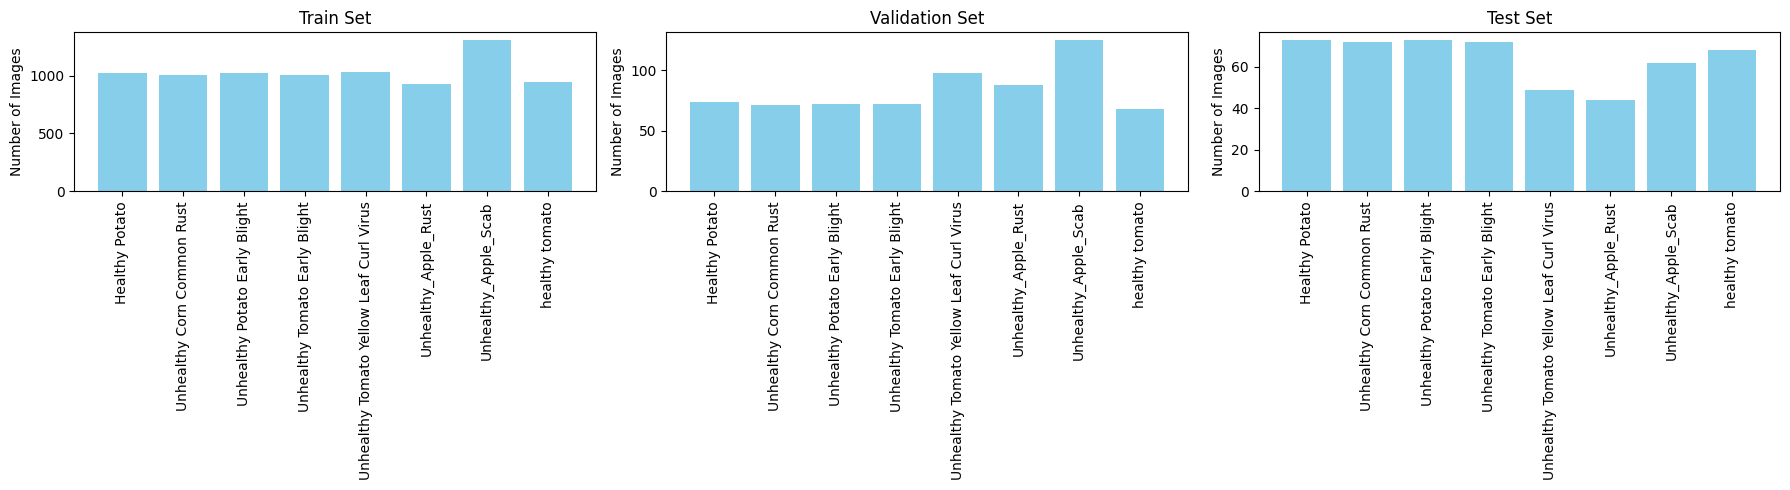

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

# H√†m ƒë·∫øm s·ªë l∆∞·ª£ng ·∫£nh trong t·ª´ng l·ªõp
def count_images_per_class(generator):
    counter = Counter(generator.classes)
    class_counts = dict(counter)
    
    # Chuy·ªÉn t·ª´ ch·ªâ s·ªë l·ªõp sang t√™n l·ªõp
    class_names = {v: k for k, v in generator.class_indices.items()}
    class_counts_named = {class_names[k]: v for k, v in class_counts.items()}
    
    return class_counts_named

# ƒê·∫øm ·∫£nh trong t·ª´ng t·∫≠p
train_counts = count_images_per_class(train_gen)
valid_counts = count_images_per_class(val_gen)
test_counts = count_images_per_class(test_gen)

# V·∫Ω bi·ªÉu ƒë·ªì
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, counts, title in zip(axes, [train_counts, valid_counts, test_counts], ['Train Set', 'Validation Set', 'Test Set']):
    ax.bar(counts.keys(), counts.values(), color='skyblue')
    ax.set_title(title)
    ax.set_xticklabels(counts.keys(), rotation=90)
    ax.set_ylabel('Number of Images')

plt.tight_layout()
plt.show()


In [27]:
import matplotlib.pyplot as plt
from collections import Counter

# H√†m ƒë·∫øm s·ªë l∆∞·ª£ng ·∫£nh trong t·ª´ng l·ªõp v√† √°nh x·∫° t√™n l·ªõp
def count_images_per_class(generator):
    class_indices = generator.class_indices  # T√™n l·ªõp theo ch·ªâ s·ªë
    index_to_class = {v: k for k, v in class_indices.items()}  # Chuy·ªÉn ƒë·ªïi ch·ªâ m·ª•c -> t√™n l·ªõp
    
    counter = Counter(generator.classes)  # ƒê·∫øm s·ªë l∆∞·ª£ng ·∫£nh theo ch·ªâ m·ª•c l·ªõp
    class_counts = {f'class{i+1} ({index_to_class[i]})': count for i, count in counter.items()}
    
    return class_counts

# G·ªçi h√†m v√† hi·ªÉn th·ªã k·∫øt qu·∫£
class_counts = count_images_per_class(generator)
print(class_counts)


NameError: name 'generator' is not defined

In [25]:
import matplotlib.pyplot as plt
from collections import Counter

# H√†m ƒë·∫øm s·ªë l∆∞·ª£ng ·∫£nh trong t·ª´ng l·ªõp v√† chuy·ªÉn th√†nh one-hot
def count_images_per_class(generator):
    counter = Counter(generator.classes)
    class_counts = dict(counter)
    
    # Chuy·ªÉn ƒë·ªïi th√†nh class1, class2, ...
    class_counts_named = {f'class{i+1}': v for i, v in enumerate(class_counts.values())}
    
    return class_counts_named

# ƒê·∫øm ·∫£nh trong t·ª´ng t·∫≠p
datasets = {
    'train': count_images_per_class(train_gen),
    'validation': count_images_per_class(val_gen),
    'test': count_images_per_class(test_gen),
}

# V·∫Ω v√† l∆∞u t·ª´ng bi·ªÉu ƒë·ªì
for dataset_name, counts in datasets.items():
    plt.figure(figsize=(8, 5))
    plt.bar(counts.keys(), counts.values(), color='skyblue')
    plt.title(f'{dataset_name.capitalize()} Set')
    plt.xticks(rotation=90)
    plt.ylabel('Number of Images')
    
    # L∆∞u bi·ªÉu ƒë·ªì
    plt.tight_layout()
    plt.savefig(f'{dataset_name}_distribution.png', dpi=300)
    plt.close()  # ƒê√≥ng figure ƒë·ªÉ tr√°nh tr√†n b·ªô nh·ªõ


In [28]:
import matplotlib.pyplot as plt
from collections import Counter

# H√†m ƒë·∫øm s·ªë l∆∞·ª£ng ·∫£nh trong t·ª´ng l·ªõp
def count_images_per_class(generator):
    counter = Counter(generator.classes)
    class_counts = dict(counter)
    
    # Chuy·ªÉn t·ª´ ch·ªâ s·ªë l·ªõp sang t√™n l·ªõp
    class_names = {v: k for k, v in generator.class_indices.items()}
    class_counts_named = {class_names[k]: v for k, v in class_counts.items()}
    
    return class_counts_named

# ƒê·∫øm ·∫£nh trong t·ª´ng t·∫≠p
train_counts = count_images_per_class(train_gen)
valid_counts = count_images_per_class(val_gen)
test_counts = count_images_per_class(test_gen)

# Danh s√°ch d·ªØ li·ªáu v√† ti√™u ƒë·ªÅ
datasets = [(train_counts, 'train_distribution_.png', 'Train Set'),
            (valid_counts, 'valid_distribution_.png', 'Validation Set'),
            (test_counts, 'test_distribution_.png', 'Test Set')]

# L∆∞u t·ª´ng bi·ªÉu ƒë·ªì th√†nh file ri√™ng
for counts, filename, title in datasets:
    plt.figure(figsize=(8, 5))
    plt.bar(counts.keys(), counts.values(), color='skyblue')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Number of Images')
    plt.tight_layout()
    plt.savefig(filename)  # L∆∞u h√¨nh ·∫£nh
    plt.close()  # ƒê√≥ng figure ƒë·ªÉ tr√°nh ch·ªìng l·∫•n

print("Bi·ªÉu ƒë·ªì ƒë√£ ƒë∆∞·ª£c l∆∞u th√†nh c√¥ng.")


Bi·ªÉu ƒë·ªì ƒë√£ ƒë∆∞·ª£c l∆∞u th√†nh c√¥ng.


In [34]:
import matplotlib.pyplot as plt
from collections import Counter

# H√†m ƒë·∫øm s·ªë l∆∞·ª£ng ·∫£nh trong t·ª´ng l·ªõp v√† √°nh x·∫° t√™n l·ªõp
def count_images_per_class(generator):
    class_indices = generator.class_indices  # T√™n l·ªõp theo ch·ªâ s·ªë
    index_to_class = {v: k for k, v in class_indices.items()}  # Chuy·ªÉn ƒë·ªïi ch·ªâ m·ª•c -> t√™n l·ªõp
    
    counter = Counter(generator.classes)  # ƒê·∫øm s·ªë l∆∞·ª£ng ·∫£nh theo ch·ªâ m·ª•c l·ªõp
    class_counts = {f'class{i+1} ({index_to_class[i]})': count for i, count in counter.items()}
    
    return class_counts

# G·ªçi h√†m v√† hi·ªÉn th·ªã k·∫øt qu·∫£
class_counts = count_images_per_class(train_gen)
print(class_counts)


{'class1 (Healthy Potato)': 1026, 'class2 (Unhealthy Corn Common Rust)': 1005, 'class3 (Unhealthy Potato Early Blight)': 1020, 'class4 (Unhealthy Tomato Early Blight)': 1005, 'class5 (Unhealthy Tomato Yellow Leaf Curl Virus)': 1032, 'class6 (Unhealthy_Apple_Rust)': 924, 'class7 (Unhealthy_Apple_Scab)': 1308, 'class8 (healthy tomato)': 948}


In [35]:
class_counts = count_images_per_class(train_gen)

# Ch·ªâ hi·ªÉn th·ªã theo ƒë·ªãnh d·∫°ng mong mu·ªën
for i, (cls, _) in enumerate(class_counts.items(), start=1):
    print(f'Class {i}: {cls.split("(")[-1][:-1]}')


Class 1: Healthy Potato
Class 2: Unhealthy Corn Common Rust
Class 3: Unhealthy Potato Early Blight
Class 4: Unhealthy Tomato Early Blight
Class 5: Unhealthy Tomato Yellow Leaf Curl Virus
Class 6: Unhealthy_Apple_Rust
Class 7: Unhealthy_Apple_Scab
Class 8: healthy tomato


# SOTA_MODEL

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, MobileNetV2, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report


class SOTAMODEL:
    def __init__(self, train_gen, val_gen, test_gen, model_name, finetune=True, regular=True):
        self.model_name = model_name
        self.finetune = finetune
        self.regular = regular
        self.train_gen = train_gen
        self.val_gen = val_gen
        self.test_gen = test_gen
        self.num_classes = len(train_gen.class_indices)  # L·∫•y s·ªë l·ªõp t·ª´ generator
        self.model = self.build_model()

    def sota_model(self):
        """Ch·ªçn m√¥ h√¨nh SOTA theo t√™n."""
        if self.model_name == 'ResNet50':
            return ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
        elif self.model_name == 'MobileNetV2':
            return MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
        elif self.model_name == 'InceptionV3':
            return InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
        elif self.model_name == 'EfficientNetB0':
            return EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
        else:
            raise ValueError(f"Model {self.model_name} kh√¥ng ƒë∆∞·ª£c h·ªó tr·ª£.")

    def build_model(self):
        """X√¢y d·ª±ng m√¥ h√¨nh."""
        base_model = self.sota_model()
        base_model.trainable = False  # ƒê√≥ng bƒÉng to√†n b·ªô m·∫°ng g·ªëc

        if self.finetune:
            for layer in base_model.layers[-30:]:  # M·ªü kh√≥a 30 t·∫ßng cu·ªëi
                layer.trainable = True

        model = Sequential([
            base_model,
            GlobalAveragePooling2D(),
            Dense(512, activation='relu', kernel_regularizer=l2(0.001) if self.regular else None),
            Dropout(0.3),
            Dense(self.num_classes, activation='softmax')  # Ph√¢n lo·∫°i nhi·ªÅu l·ªõp
        ])

        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

        model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def training_testing(self, epochs=20):
        """Hu·∫•n luy·ªán m√¥ h√¨nh v√† ƒë√°nh gi√° tr√™n t·∫≠p test."""
        print(f'B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán {self.model_name}...')

        with tf.device('/GPU:0'):
            history = self.model.fit(
                self.train_gen,
                validation_data=self.val_gen,
                epochs=epochs,
                verbose=1
            )

        test_loss, test_acc = self.model.evaluate(self.test_gen)
        print(f'ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p test: {test_acc*100:.2f}%')

        # üìå X√°c ƒë·ªãnh t√™n file l∆∞u m√¥ h√¨nh
        model_filename = self.model_name
        if self.finetune and self.regular:
            model_filename += "_modified"
        elif self.finetune:
            model_filename += "_finetune"
        elif not self.finetune and not self.regular:
            model_filename += "_transfer"
        model_filename += ".h5"

        # L∆∞u m√¥ h√¨nh
        save_path = f"/kaggle/working/{model_filename}"
        self.model.save(save_path)
        print(f"M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u t·∫°i: {save_path}")

        # üìà V·∫Ω bi·ªÉu ƒë·ªì Accuracy v√† Loss
        acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
        loss, val_loss = history.history['loss'], history.history['val_loss']
        epochs_range = range(len(acc))

        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle(f'K·∫øt qu·∫£ hu·∫•n luy·ªán ({self.model_name})')

        ax[0].plot(epochs_range, acc, 'r', label="Train Accuracy")
        ax[0].plot(epochs_range, val_acc, 'b', label="Val Accuracy")
        ax[0].set_title("ƒê·ªô ch√≠nh x√°c")
        ax[0].legend(loc='lower right')
        ax[0].set_xlabel('Epochs')
        ax[0].set_ylabel('Accuracy')

        ax[1].plot(epochs_range, loss, 'r', label="Train Loss")
        ax[1].plot(epochs_range, val_loss, 'b', label="Val Loss")
        ax[1].set_title("M·∫•t m√°t")
        ax[1].legend(loc='upper right')
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Loss')

        plt.tight_layout()
        plt.show()

        # üìä D·ª± ƒëo√°n tr√™n t·∫≠p test
        y_true = self.test_gen.classes
        class_names = list(self.test_gen.class_indices.keys())

        y_pred_probs = self.model.predict(self.test_gen)
        y_pred = np.argmax(y_pred_probs, axis=1)

        # üî• V·∫Ω confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("D·ª± ƒëo√°n")
        plt.ylabel("Th·ª±c t·∫ø")
        plt.title("Confusion Matrix")
        plt.show()

        # üìù In b√°o c√°o ph√¢n lo·∫°i
        print("B√°o c√°o ph√¢n lo·∫°i:\n", classification_report(y_true, y_pred, target_names=class_names))


# Transfer

## ResNet50

In [15]:
train_path = '/kaggle/working/Plant-Disease-Detection-1/train'
val_path = '/kaggle/working/Plant-Disease-Detection-1/valid'
test_path = '/kaggle/working/Plant-Disease-Detection-1/test'

train_gen = DATALOADER(use_augmentation=False).train_gen(train_path)
val_gen = DATALOADER(use_augmentation=False).val_test_gen(val_path)
test_gen = DATALOADER(use_augmentation=False).val_test_gen(test_path)

Found 8268 images belonging to 8 classes.
Found 668 images belonging to 8 classes.
Found 513 images belonging to 8 classes.


Training ResNet50...
Epoch 1/20


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49s 151ms/step - accuracy: 0.2414 - loss: 1.9752 - val_accuracy: 0.3593 - val_loss: 1.5947
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 128ms/step - accuracy: 0.4004 - loss: 1.5151 - val_accuracy: 0.4790 - val_loss: 1.3538
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 125ms/step - accuracy: 0.4775 - loss: 1.3438 - val_accuracy: 0.5120 - val_loss: 1.3027
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 136ms/step - accuracy: 0.4960 - loss: 1.2844 - val_accuracy: 0.4551 - val_loss: 1.3519
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 128ms/step - accuracy: 0.5193 - loss: 1.2543 - val_accuracy: 0.5284 - val_loss: 1.1920
Epoch 6/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 130ms/step - accuracy: 0.5529 - loss: 1.1807 - val_accuracy: 0.5614 - va

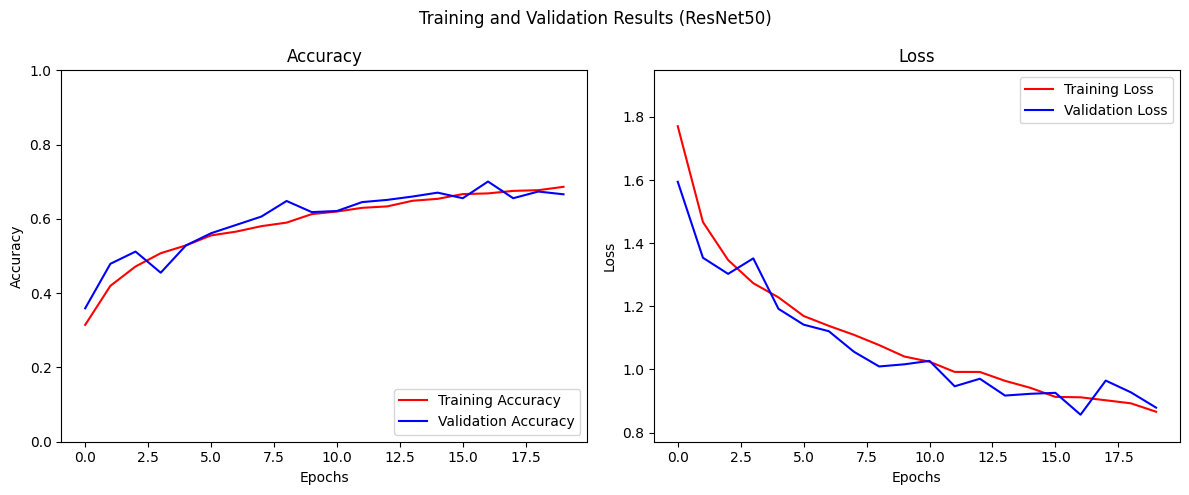

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 272ms/step


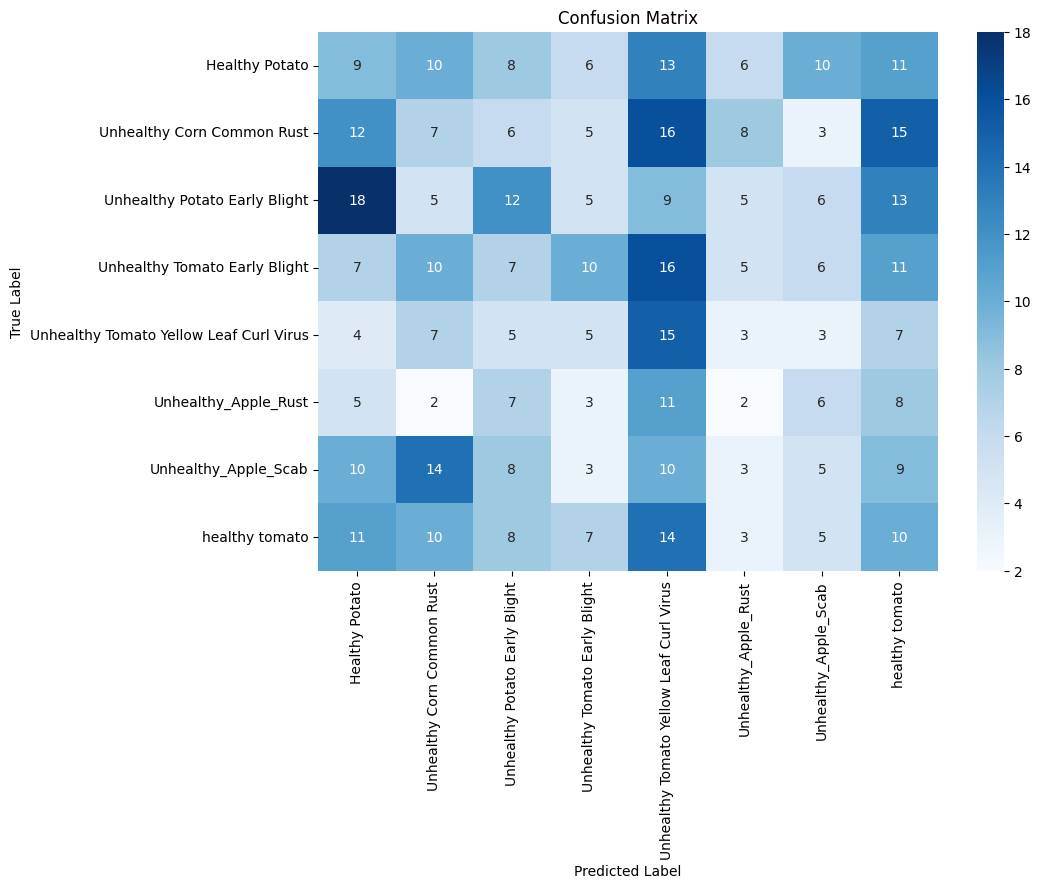

Classification Report:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.12      0.12      0.12        73
             Unhealthy Corn Common Rust       0.11      0.10      0.10        72
          Unhealthy Potato Early Blight       0.20      0.16      0.18        73
          Unhealthy Tomato Early Blight       0.23      0.14      0.17        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.14      0.31      0.20        49
                   Unhealthy_Apple_Rust       0.06      0.05      0.05        44
                   Unhealthy_Apple_Scab       0.11      0.08      0.09        62
                         healthy tomato       0.12      0.15      0.13        68

                               accuracy                           0.14       513
                              macro avg       0.14      0.14      0.13       513
                           weighted avg       0.14      0.14      0.13       513



In [16]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='ResNet50',finetune=False,regular=False)
trainer.training_testing(epochs=20)

## MobileNetv2

`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.


9406464/9406464 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
Training MobileNetV2...
Epoch 1/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 169ms/step - accuracy: 0.8165 - loss: 0.5817 - val_accuracy: 0.9476 - val_loss: 0.1629
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 123ms/step - accuracy: 0.9668 - loss: 0.1060 - val_accuracy: 0.9521 - val_loss: 0.1609
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 126ms/step - accuracy: 0.9838 - loss: 0.0572 - val_accuracy: 0.9476 - val_loss: 0.1553
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 124ms/step - accuracy: 0.9858 - loss: 0.0395 - val_accuracy: 0.9431 - val_loss: 0.1914
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 126ms/step - accuracy: 0.9892 - loss: 0.0325 - val_accuracy: 0.9491 - val_loss: 0.1732
Epoch 6/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚

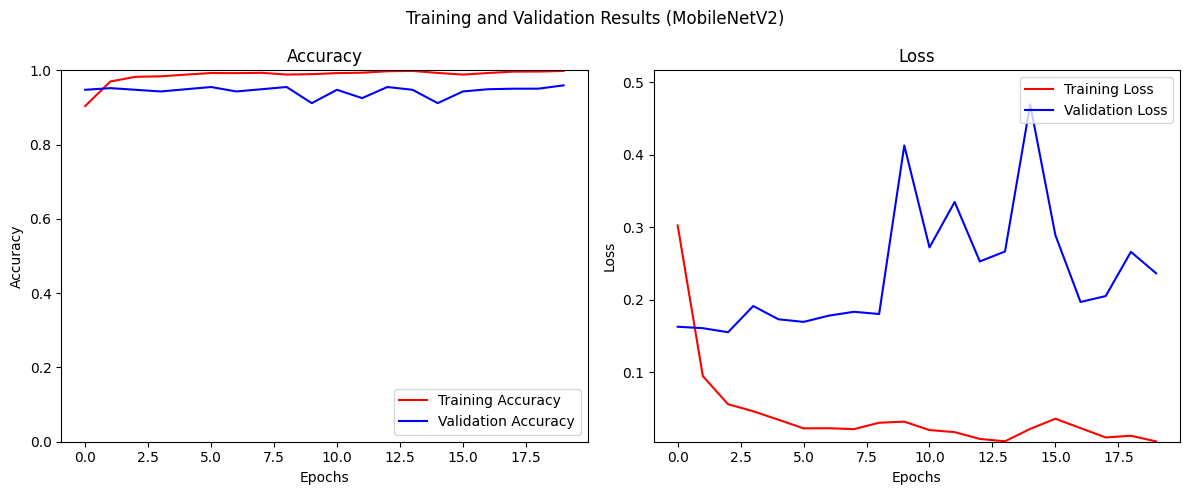

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 235ms/step


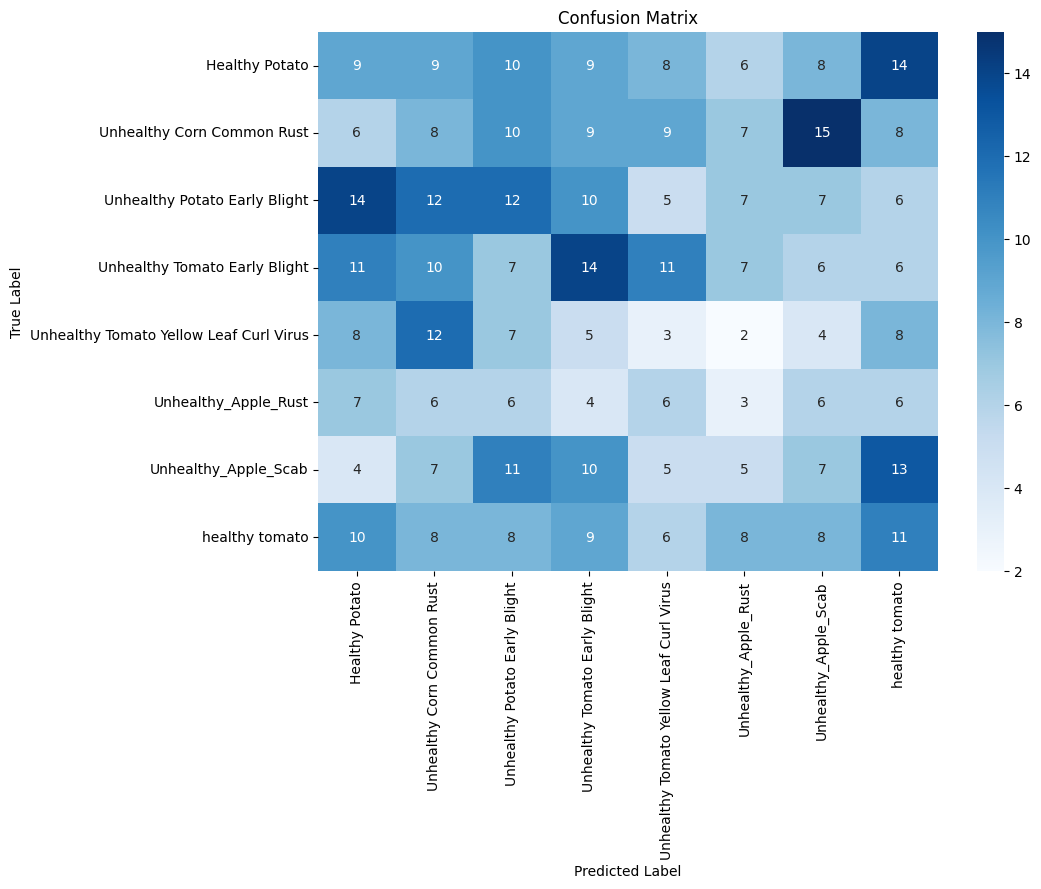

Classification Report:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.13      0.12      0.13        73
             Unhealthy Corn Common Rust       0.11      0.11      0.11        72
          Unhealthy Potato Early Blight       0.17      0.16      0.17        73
          Unhealthy Tomato Early Blight       0.20      0.19      0.20        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.06      0.06      0.06        49
                   Unhealthy_Apple_Rust       0.07      0.07      0.07        44
                   Unhealthy_Apple_Scab       0.11      0.11      0.11        62
                         healthy tomato       0.15      0.16      0.16        68

                               accuracy                           0.13       513
                              macro avg       0.13      0.12      0.12       513
                           weighted avg       0.13      0.13      0.13       513



In [20]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='MobileNetV2',finetune=False,regular=False)
trainer.training_testing(epochs=20)

## EfficientNetB0

16705208/16705208 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
Training EfficientNetB0...
Epoch 1/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 72s 199ms/step - accuracy: 0.1434 - loss: 2.0877 - val_accuracy: 0.1871 - val_loss: 2.0744
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 124ms/step - accuracy: 0.1584 - loss: 2.0770 - val_accuracy: 0.1871 - val_loss: 2.0737
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 126ms/step - accuracy: 0.1587 - loss: 2.0753 - val_accuracy: 0.1871 - val_loss: 2.0714
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 125ms/step - accuracy: 0.1595 - loss: 2.0749 - val_accuracy: 0.1871 - val_loss: 2.0686
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 122ms/step - accuracy: 0.1576 - loss: 2.0760 - val_accuracy: 0.1871 - val_loss: 2.0675
Epoch 6/20
259/259 ‚îÅ‚îÅ‚î

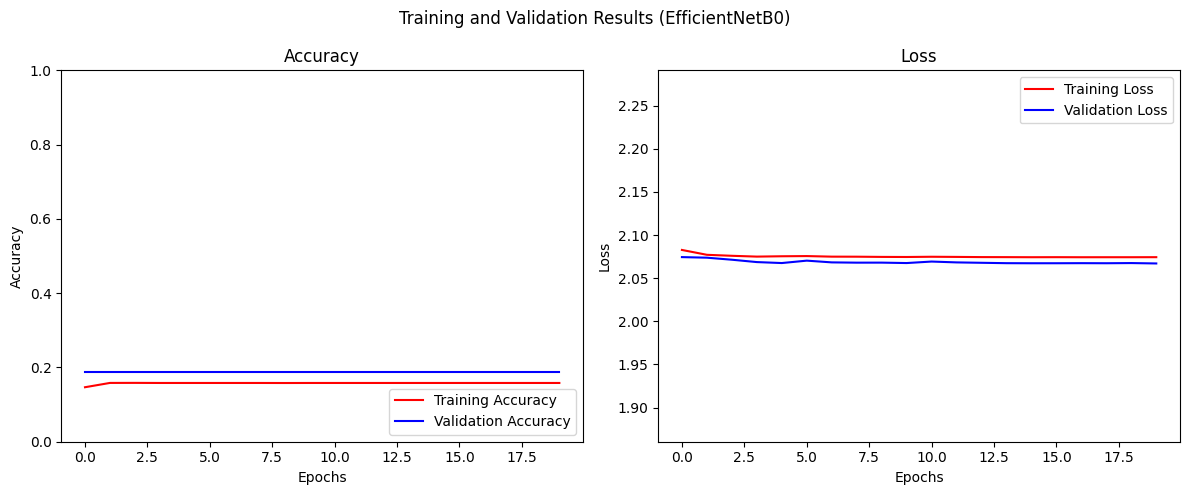

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 441ms/step


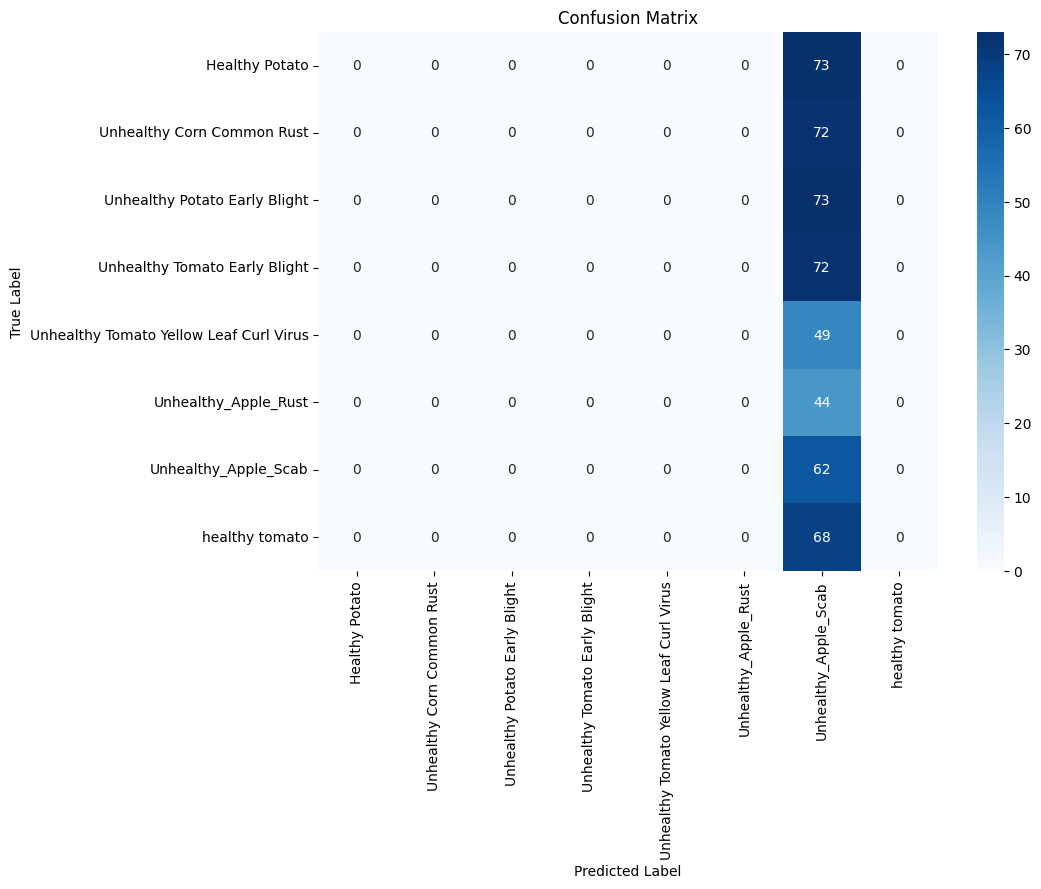

Classification Report:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.00      0.00      0.00        73
             Unhealthy Corn Common Rust       0.00      0.00      0.00        72
          Unhealthy Potato Early Blight       0.00      0.00      0.00        73
          Unhealthy Tomato Early Blight       0.00      0.00      0.00        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.00      0.00      0.00        49
                   Unhealthy_Apple_Rust       0.00      0.00      0.00        44
                   Unhealthy_Apple_Scab       0.12      1.00      0.22        62
                         healthy tomato       0.00      0.00      0.00        68

                               accuracy                           0.12       513
                              macro avg       0.02      0.12      0.03       513
                           weighted avg       0.01      0.12      0.03       513



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [22]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='EfficientNetB0',finetune=False,regular=False)
trainer.training_testing(epochs=20)

## InceptionB0

In [24]:
train_path = '/kaggle/working/Plant-Disease-Detection-1/train'
val_path = '/kaggle/working/Plant-Disease-Detection-1/valid'
test_path = '/kaggle/working/Plant-Disease-Detection-1/test'

train_gen = DATALOADER(target_size=(299,299),use_augmentation=False).train_gen(train_path)
val_gen = DATALOADER(target_size=(299,299),use_augmentation=False).val_test_gen(val_path)
test_gen = DATALOADER(target_size=(299,299),use_augmentation=False).val_test_gen(test_path)

Found 8268 images belonging to 8 classes.
Found 668 images belonging to 8 classes.
Found 513 images belonging to 8 classes.


Training InceptionV3...
Epoch 1/20


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99s 300ms/step - accuracy: 0.7858 - loss: 0.6512 - val_accuracy: 0.9371 - val_loss: 0.1780
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 51s 191ms/step - accuracy: 0.9508 - loss: 0.1581 - val_accuracy: 0.9476 - val_loss: 0.1397
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50s 190ms/step - accuracy: 0.9709 - loss: 0.0973 - val_accuracy: 0.9416 - val_loss: 0.1577
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49s 186ms/step - accuracy: 0.9751 - loss: 0.0763 - val_accuracy: 0.9626 - val_loss: 0.1017
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50s 190ms/step - accuracy: 0.9800 - loss: 0.0610 - val_accuracy: 0.9671 - val_loss: 0.1142
Epoch 6/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50s 188ms/step - accuracy: 0.9851 - loss: 0.0511 - val_accuracy: 0.9746 - va

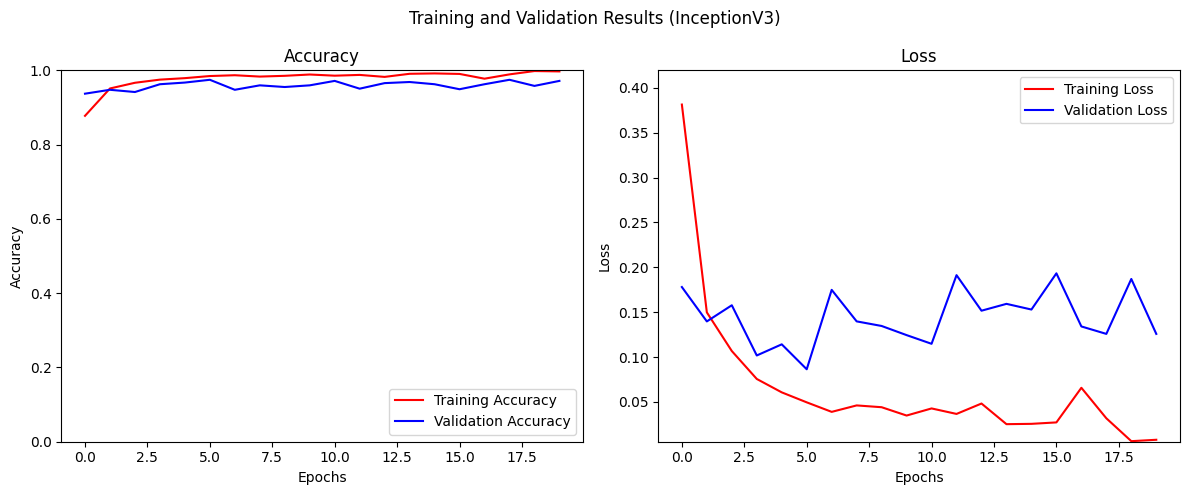

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 523ms/step


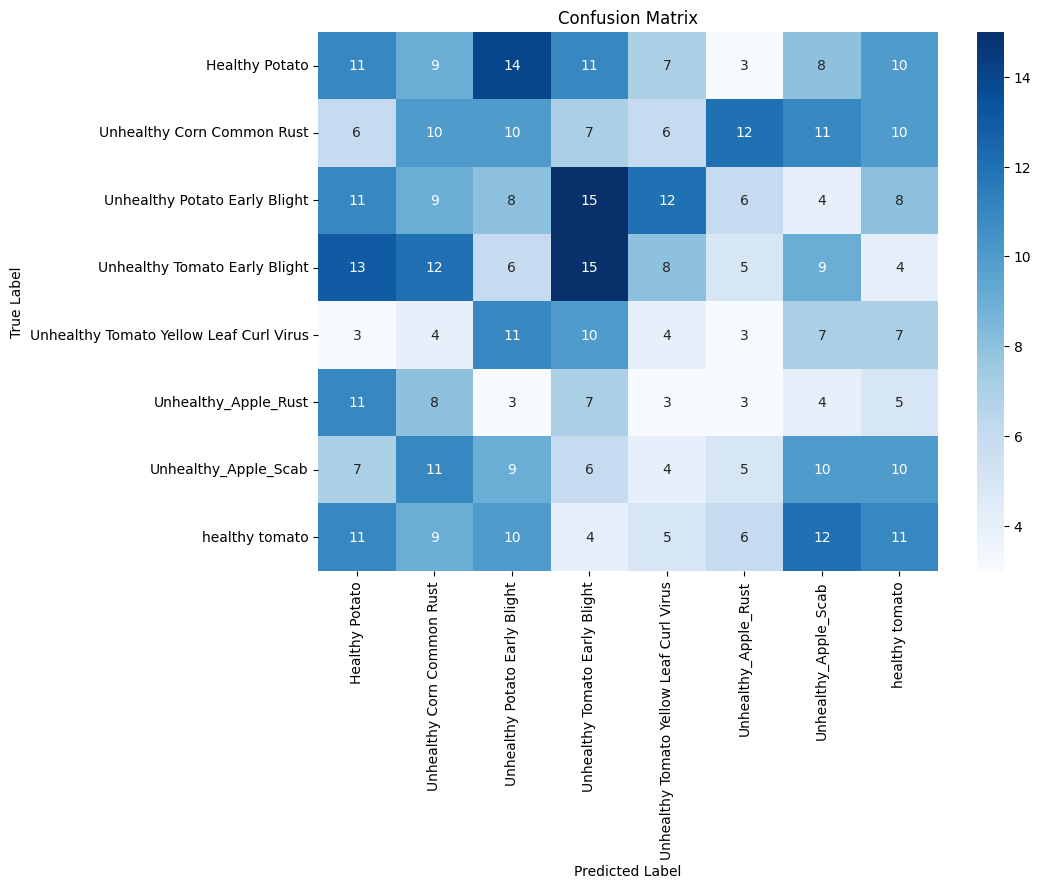

Classification Report:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.15      0.15      0.15        73
             Unhealthy Corn Common Rust       0.14      0.14      0.14        72
          Unhealthy Potato Early Blight       0.11      0.11      0.11        73
          Unhealthy Tomato Early Blight       0.20      0.21      0.20        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.08      0.08      0.08        49
                   Unhealthy_Apple_Rust       0.07      0.07      0.07        44
                   Unhealthy_Apple_Scab       0.15      0.16      0.16        62
                         healthy tomato       0.17      0.16      0.17        68

                               accuracy                           0.14       513
                              macro avg       0.13      0.14      0.13       513
                           weighted avg       0.14      0.14      0.14       513



In [25]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='InceptionV3',finetune=False,regular=False)
trainer.training_testing(epochs=20)

# FineTune

In [26]:
train_path = '/kaggle/working/Plant-Disease-Detection-1/train'
val_path = '/kaggle/working/Plant-Disease-Detection-1/valid'
test_path = '/kaggle/working/Plant-Disease-Detection-1/test'

train_gen = DATALOADER(use_augmentation=True).train_gen(train_path)
val_gen = DATALOADER(use_augmentation=True).val_test_gen(val_path)
test_gen = DATALOADER(use_augmentation=True).val_test_gen(test_path)

Found 8268 images belonging to 8 classes.
Found 668 images belonging to 8 classes.
Found 513 images belonging to 8 classes.


## ResNet

94765736/94765736 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán ResNet50...
Epoch 1/20


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 180s 600ms/step - accuracy: 0.2769 - loss: 1.8561 - val_accuracy: 0.1931 - val_loss: 17.2570
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 139s 521ms/step - accuracy: 0.4296 - loss: 1.4252 - val_accuracy: 0.1707 - val_loss: 7.9614
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 135s 508ms/step - accuracy: 0.4841 - loss: 1.3428 - val_accuracy: 0.1946 - val_loss: 8.3584
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 136s 513ms/step - accuracy: 0.5381 - loss: 1.2251 - val_accuracy: 0.2290 - val_loss: 3.7531
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 135s 508ms/step - accuracy: 0.5502 - loss: 1.1474 - val_accuracy: 0.1198 - val_loss: 8.4170
Epoch 6/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 138s 519ms/step - accuracy: 0.5899 - loss: 1.0597 - val_accuracy: 0.30

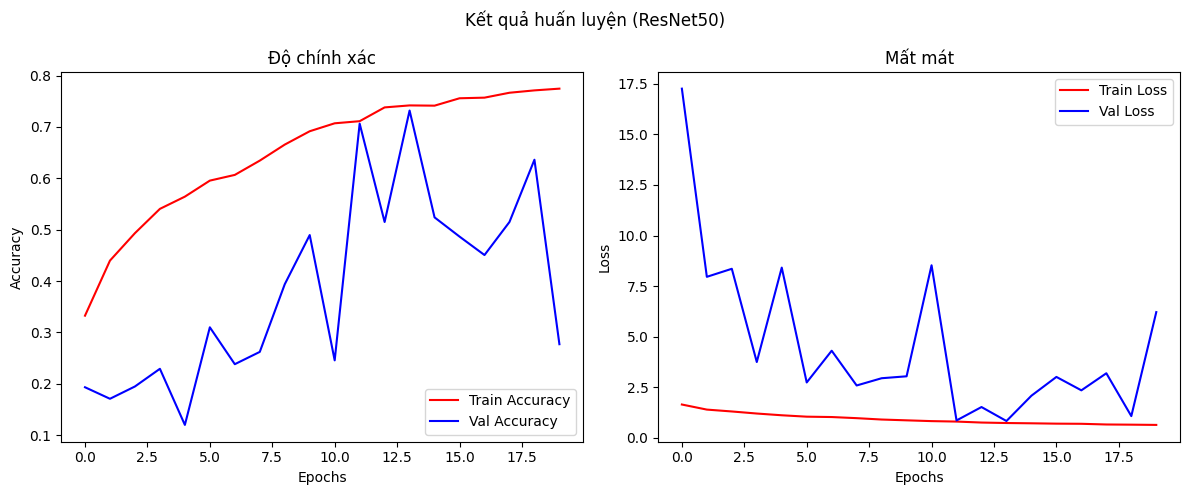

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 289ms/step


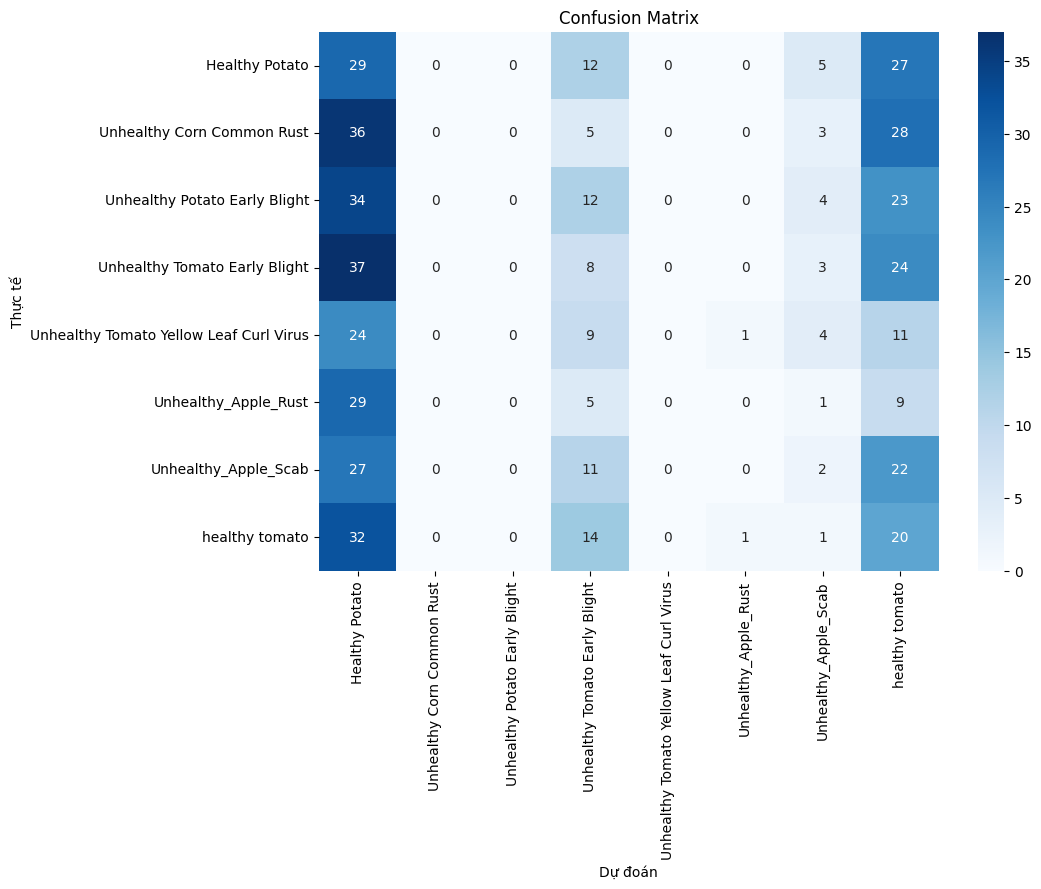

B√°o c√°o ph√¢n lo·∫°i:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.12      0.40      0.18        73
             Unhealthy Corn Common Rust       0.00      0.00      0.00        72
          Unhealthy Potato Early Blight       0.00      0.00      0.00        73
          Unhealthy Tomato Early Blight       0.11      0.11      0.11        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.00      0.00      0.00        49
                   Unhealthy_Apple_Rust       0.00      0.00      0.00        44
                   Unhealthy_Apple_Scab       0.09      0.03      0.05        62
                         healthy tomato       0.12      0.29      0.17        68

                               accuracy                           0.12       513
                              macro avg       0.05      0.10      0.06       513
                           weighted avg       0.06      0.12      0.07       513



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [6]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='ResNet50',finetune=True,regular=False)
trainer.training_testing(epochs=20)

## MobileNet

`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.


9406464/9406464 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán MobileNetV2...
Epoch 1/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 167s 563ms/step - accuracy: 0.8324 - loss: 0.5361 - val_accuracy: 0.6557 - val_loss: 3.4007
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 136s 510ms/step - accuracy: 0.9580 - loss: 0.1467 - val_accuracy: 0.7859 - val_loss: 2.7893
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 133s 501ms/step - accuracy: 0.9698 - loss: 0.0973 - val_accuracy: 0.8757 - val_loss: 1.1822
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 138s 516ms/step - accuracy: 0.9695 - loss: 0.1009 - val_accuracy: 0.8997 - val_loss: 1.1764
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 135s 506ms/step - accuracy: 0.9720 - loss: 0.0910 - val_accuracy: 0.8653 - val_loss: 1.0603
Epoch 6/

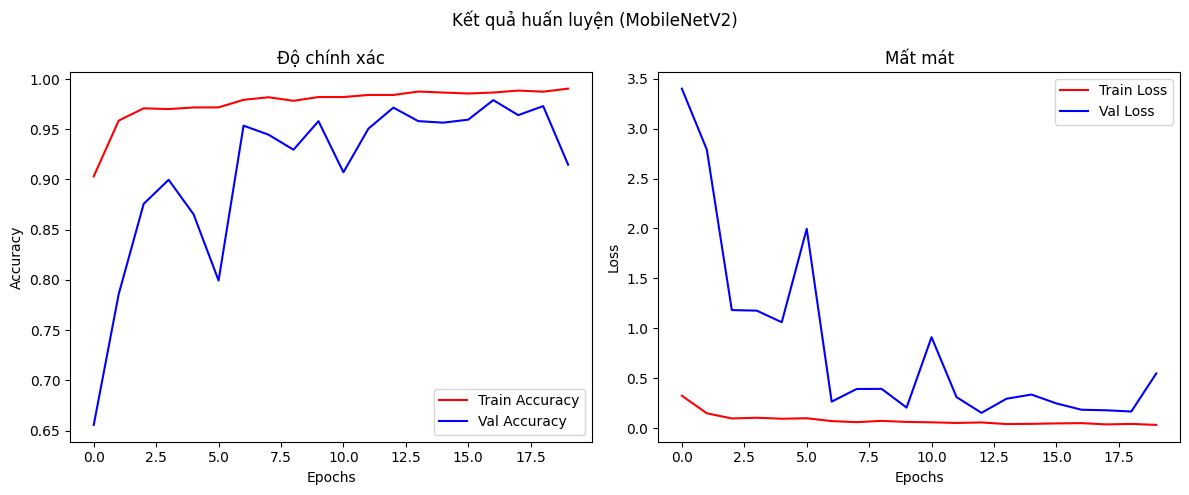

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 244ms/step


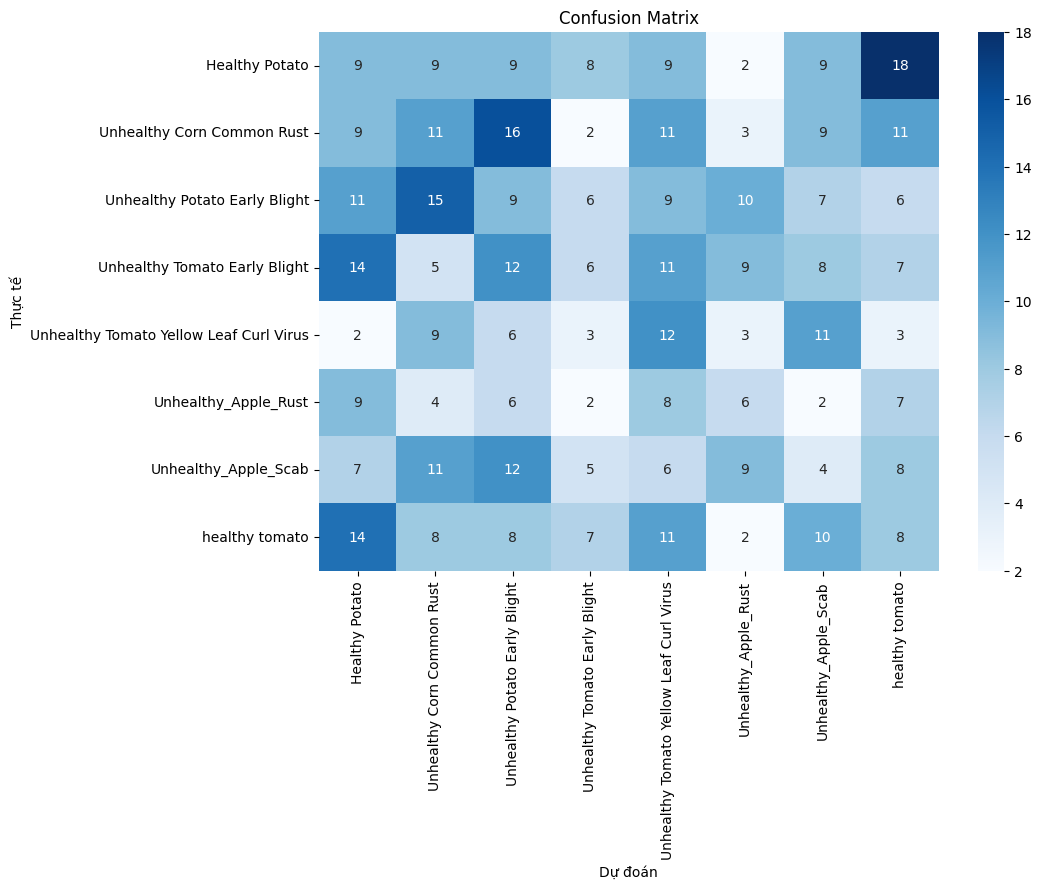

B√°o c√°o ph√¢n lo·∫°i:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.12      0.12      0.12        73
             Unhealthy Corn Common Rust       0.15      0.15      0.15        72
          Unhealthy Potato Early Blight       0.12      0.12      0.12        73
          Unhealthy Tomato Early Blight       0.15      0.08      0.11        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.16      0.24      0.19        49
                   Unhealthy_Apple_Rust       0.14      0.14      0.14        44
                   Unhealthy_Apple_Scab       0.07      0.06      0.07        62
                         healthy tomato       0.12      0.12      0.12        68

                               accuracy                           0.13       513
                              macro avg       0.13      0.13      0.13       513
                           weighted avg       0.13      0.13      0.12       513



In [7]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='MobileNetV2',finetune=True,regular=False)
trainer.training_testing(epochs=20)

## InceptionV3

In [9]:
train_path = '/kaggle/working/Plant-Disease-Detection-1/train'
val_path = '/kaggle/working/Plant-Disease-Detection-1/valid'
test_path = '/kaggle/working/Plant-Disease-Detection-1/test'

train_gen = DATALOADER(target_size=(299,299),use_augmentation=False).train_gen(train_path)
val_gen = DATALOADER(target_size=(299,299),use_augmentation=False).val_test_gen(val_path)
test_gen = DATALOADER(target_size=(299,299),use_augmentation=False).val_test_gen(test_path)

Found 8268 images belonging to 8 classes.
Found 668 images belonging to 8 classes.
Found 513 images belonging to 8 classes.


B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán InceptionV3...
Epoch 1/20


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 107s 304ms/step - accuracy: 0.8738 - loss: 0.4164 - val_accuracy: 0.9641 - val_loss: 0.1159
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50s 190ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.9820 - val_loss: 0.0834
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52s 197ms/step - accuracy: 0.9880 - loss: 0.0345 - val_accuracy: 0.9820 - val_loss: 0.1038
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 51s 192ms/step - accuracy: 0.9916 - loss: 0.0279 - val_accuracy: 0.9686 - val_loss: 0.1877
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52s 195ms/step - accuracy: 0.9909 - loss: 0.0259 - val_accuracy: 0.9731 - val_loss: 0.1285
Epoch 6/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 51s 190ms/step - accuracy: 0.9954 - loss: 0.0160 - val_accuracy: 0.9775 - v

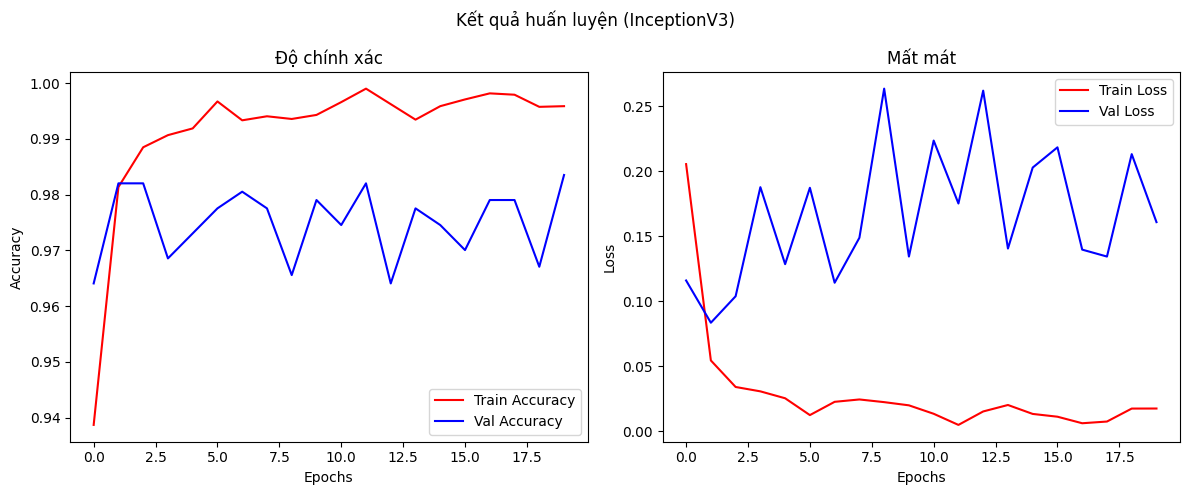

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 512ms/step


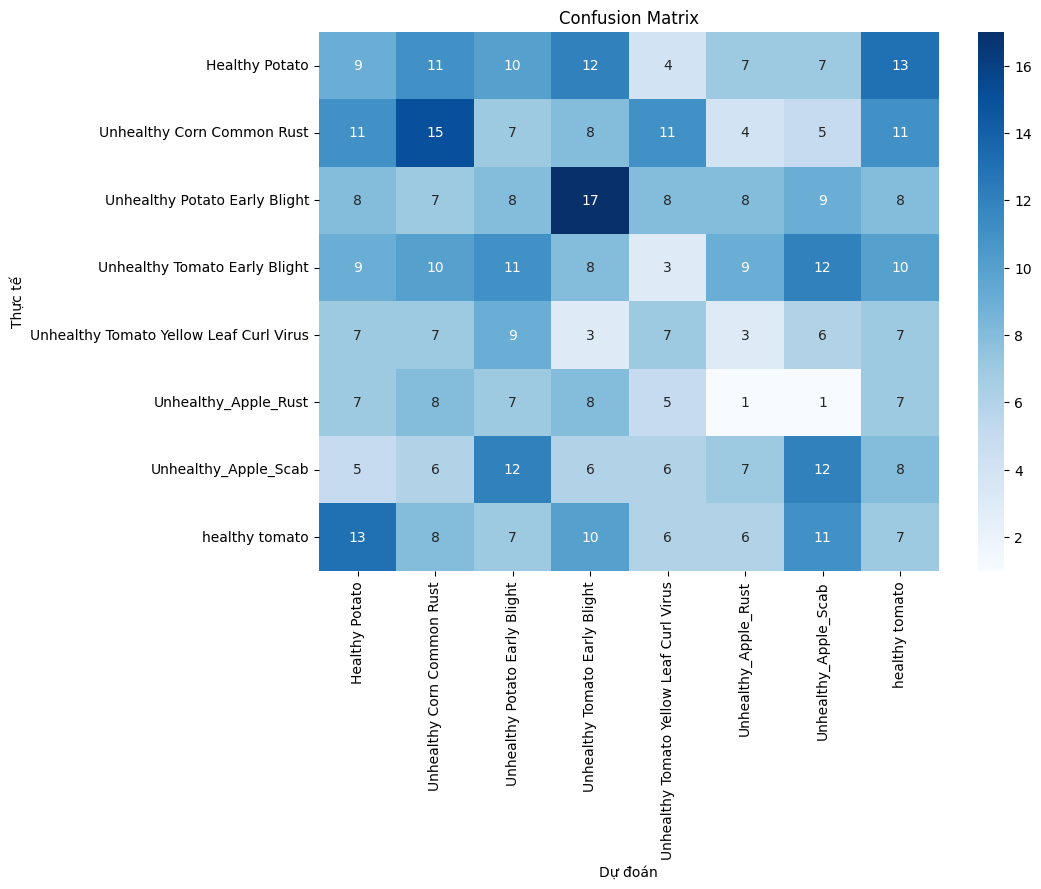

B√°o c√°o ph√¢n lo·∫°i:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.13      0.12      0.13        73
             Unhealthy Corn Common Rust       0.21      0.21      0.21        72
          Unhealthy Potato Early Blight       0.11      0.11      0.11        73
          Unhealthy Tomato Early Blight       0.11      0.11      0.11        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.14      0.14      0.14        49
                   Unhealthy_Apple_Rust       0.02      0.02      0.02        44
                   Unhealthy_Apple_Scab       0.19      0.19      0.19        62
                         healthy tomato       0.10      0.10      0.10        68

                               accuracy                           0.13       513
                              macro avg       0.13      0.13      0.13       513
                           weighted avg       0.13      0.13      0.13       513



In [10]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='InceptionV3',finetune=True,regular=False)
trainer.training_testing(epochs=20)

## EfficientV3

In [11]:
train_path = '/kaggle/working/Plant-Disease-Detection-1/train'
val_path = '/kaggle/working/Plant-Disease-Detection-1/valid'
test_path = '/kaggle/working/Plant-Disease-Detection-1/test'

train_gen = DATALOADER(target_size=(256,256),use_augmentation=False).train_gen(train_path)
val_gen = DATALOADER(target_size=(256,256),use_augmentation=False).val_test_gen(val_path)
test_gen = DATALOADER(target_size=(256,256),use_augmentation=False).val_test_gen(test_path)

Found 8268 images belonging to 8 classes.
Found 668 images belonging to 8 classes.
Found 513 images belonging to 8 classes.


B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán EfficientNetB0...
Epoch 1/20


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85s 223ms/step - accuracy: 0.1385 - loss: 2.1413 - val_accuracy: 0.1871 - val_loss: 2.0709
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 131ms/step - accuracy: 0.1448 - loss: 2.0808 - val_accuracy: 0.1871 - val_loss: 2.0725
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 127ms/step - accuracy: 0.1526 - loss: 2.0778 - val_accuracy: 0.1871 - val_loss: 2.0706
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 127ms/step - accuracy: 0.1626 - loss: 2.0742 - val_accuracy: 0.1871 - val_loss: 2.0690
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 134ms/step - accuracy: 0.1609 - loss: 2.0737 - val_accuracy: 0.1871 - val_loss: 2.0681
Epoch 6/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 127ms/step - accuracy: 0.1552 - loss: 2.0751 - val_accuracy: 0.1871 - va

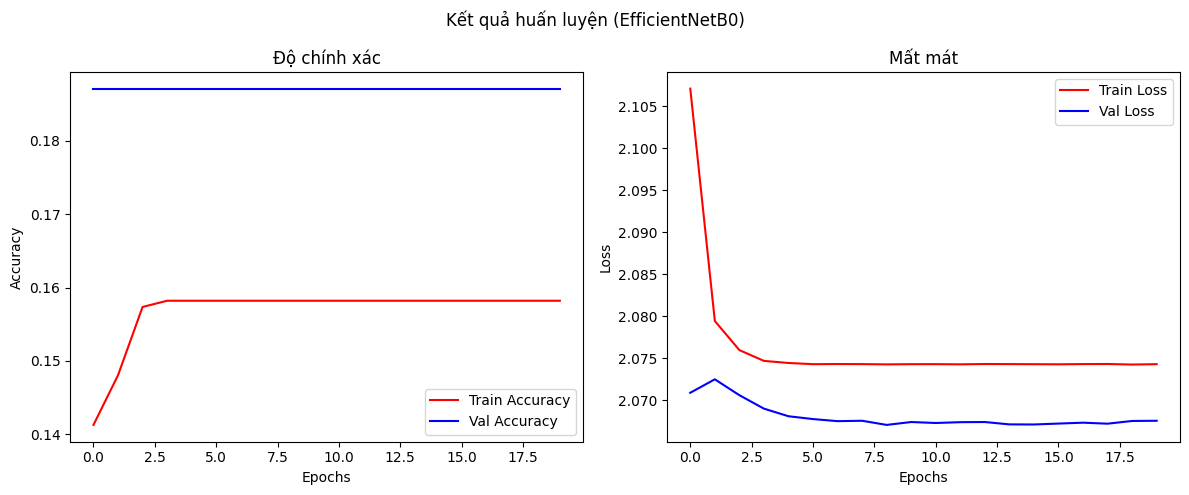

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 445ms/step


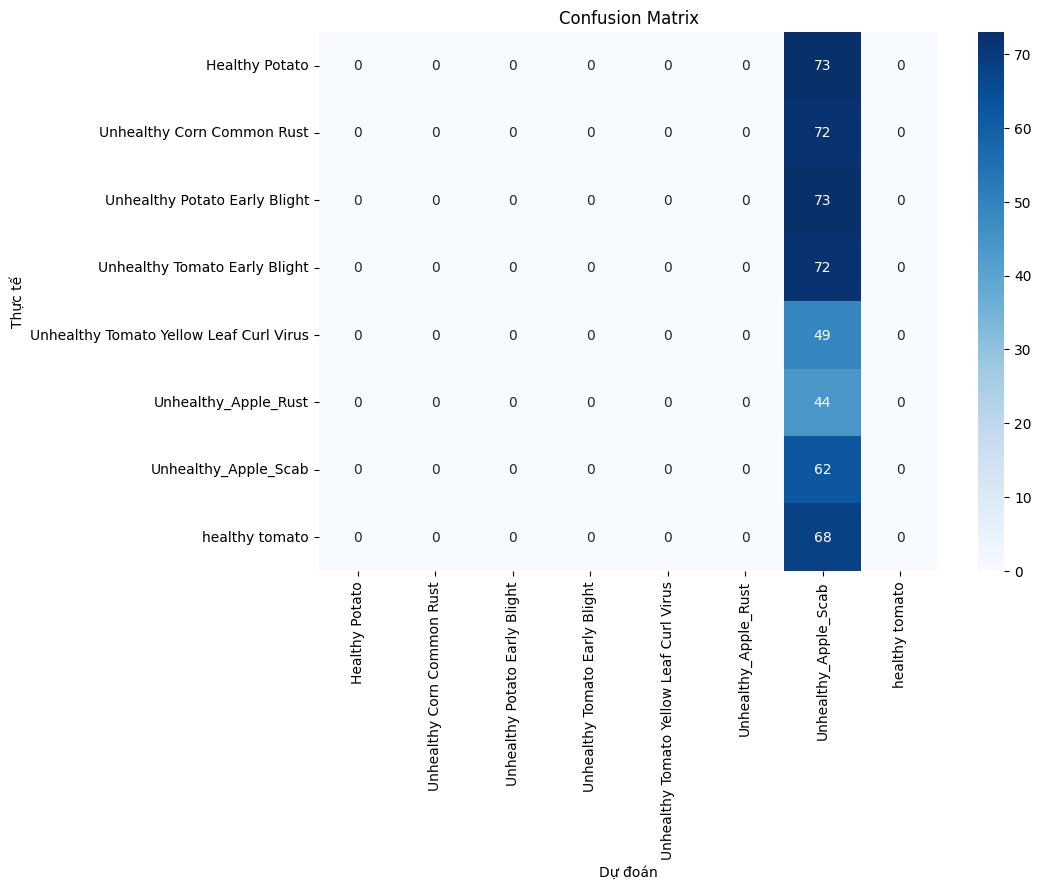

B√°o c√°o ph√¢n lo·∫°i:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.00      0.00      0.00        73
             Unhealthy Corn Common Rust       0.00      0.00      0.00        72
          Unhealthy Potato Early Blight       0.00      0.00      0.00        73
          Unhealthy Tomato Early Blight       0.00      0.00      0.00        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.00      0.00      0.00        49
                   Unhealthy_Apple_Rust       0.00      0.00      0.00        44
                   Unhealthy_Apple_Scab       0.12      1.00      0.22        62
                         healthy tomato       0.00      0.00      0.00        68

                               accuracy                           0.12       513
                              macro avg       0.02      0.12      0.03       513
                           weighted avg       0.01      0.12      0.03       513



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [13]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='EfficientNetB0',finetune=True,regular=False)
trainer.training_testing(epochs=20)

# Modified

## EfficientNetB0

B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán EfficientNetB0...
Epoch 1/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79s 208ms/step - accuracy: 0.1391 - loss: 2.7061 - val_accuracy: 0.1063 - val_loss: 2.2485
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 131ms/step - accuracy: 0.1434 - loss: 2.2025 - val_accuracy: 0.1108 - val_loss: 2.1177
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 127ms/step - accuracy: 0.1537 - loss: 2.1095 - val_accuracy: 0.1078 - val_loss: 2.0908
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 130ms/step - accuracy: 0.1505 - loss: 2.0923 - val_accuracy: 0.1871 - val_loss: 2.0756
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 129ms/step - accuracy: 0.1507 - loss: 2.0802 - val_accuracy: 0.1871 - val_loss: 2.0685
Epoch 6/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 132ms/step - ac

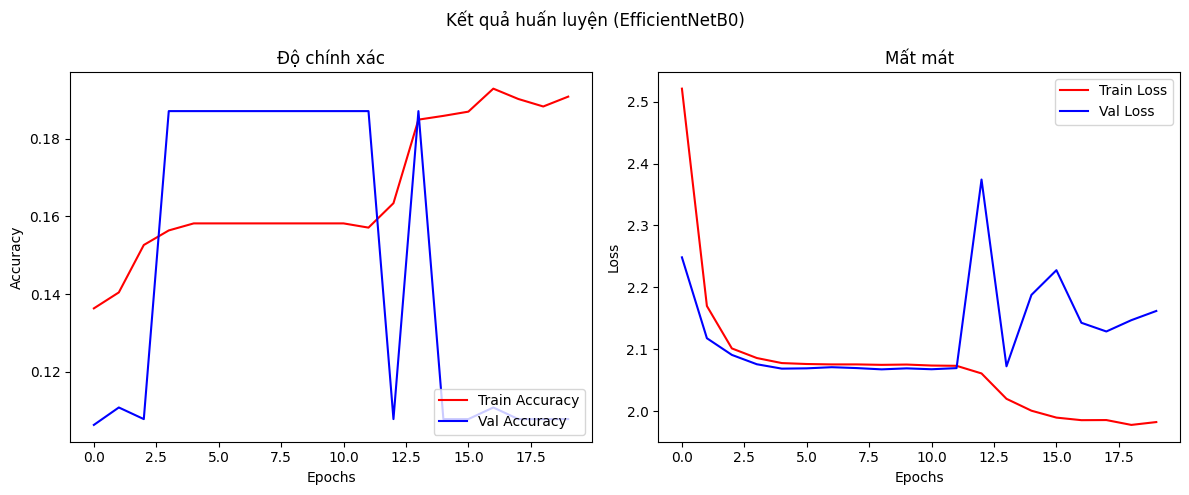

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 396ms/step


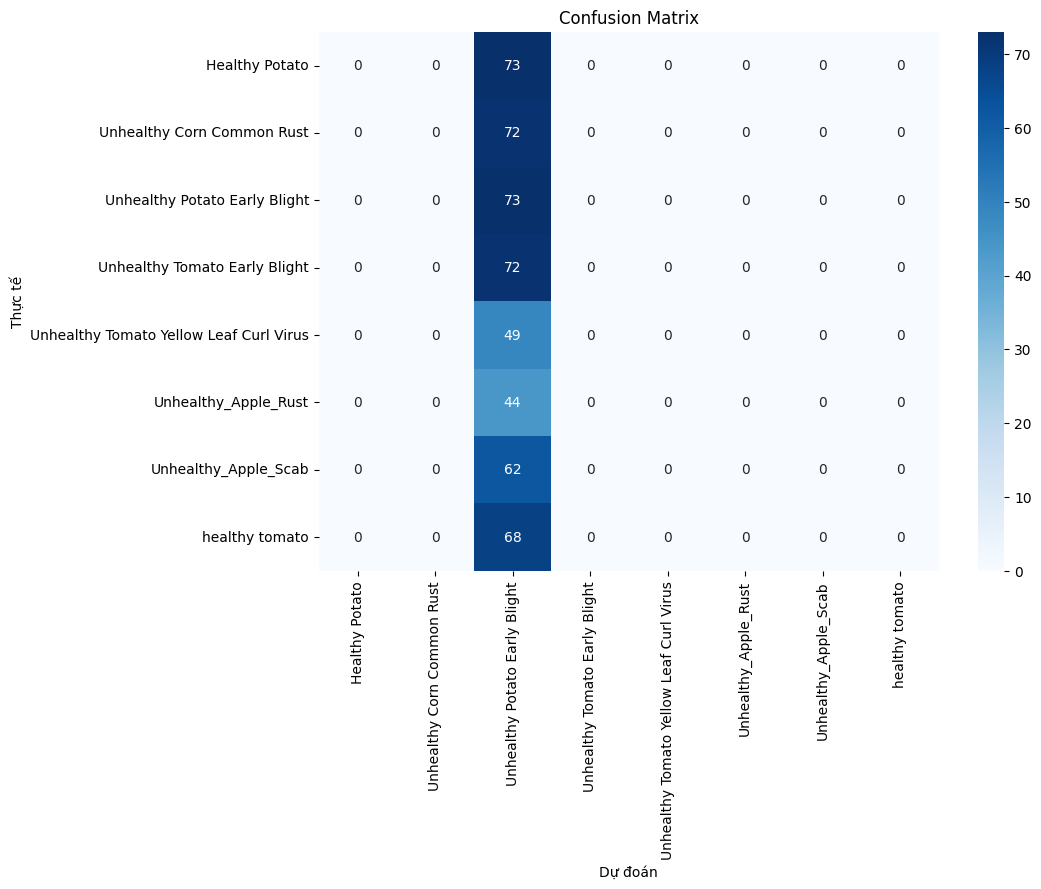

B√°o c√°o ph√¢n lo·∫°i:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.00      0.00      0.00        73
             Unhealthy Corn Common Rust       0.00      0.00      0.00        72
          Unhealthy Potato Early Blight       0.14      1.00      0.25        73
          Unhealthy Tomato Early Blight       0.00      0.00      0.00        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.00      0.00      0.00        49
                   Unhealthy_Apple_Rust       0.00      0.00      0.00        44
                   Unhealthy_Apple_Scab       0.00      0.00      0.00        62
                         healthy tomato       0.00      0.00      0.00        68

                               accuracy                           0.14       513
                              macro avg       0.02      0.12      0.03       513
                           weighted avg       0.02      0.14      0.04       513



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [14]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='EfficientNetB0',finetune=True,regular=True)
trainer.training_testing(epochs=20)

## ResNet

B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán ResNet50...
Epoch 1/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67s 194ms/step - accuracy: 0.3523 - loss: 2.2715 - val_accuracy: 0.1123 - val_loss: 48.9468
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 147ms/step - accuracy: 0.6015 - loss: 1.2554 - val_accuracy: 0.1108 - val_loss: 16.2928
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 145ms/step - accuracy: 0.6855 - loss: 0.9746 - val_accuracy: 0.1153 - val_loss: 14.1695
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 146ms/step - accuracy: 0.7468 - loss: 0.8015 - val_accuracy: 0.1916 - val_loss: 5.0802
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 146ms/step - accuracy: 0.7701 - loss: 0.7410 - val_accuracy: 0.2814 - val_loss: 3.2753
Epoch 6/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 148ms/step - accur

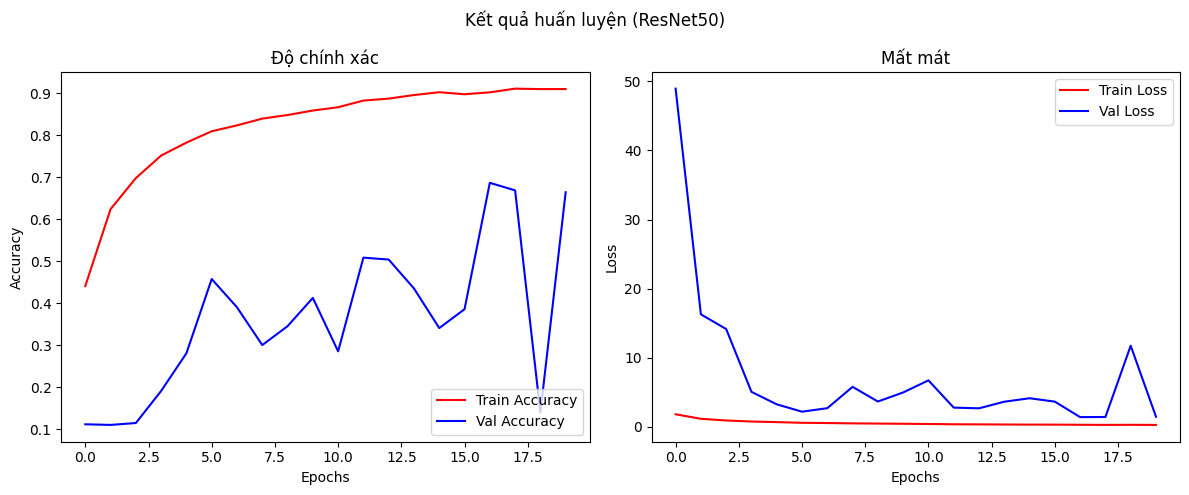

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 301ms/step


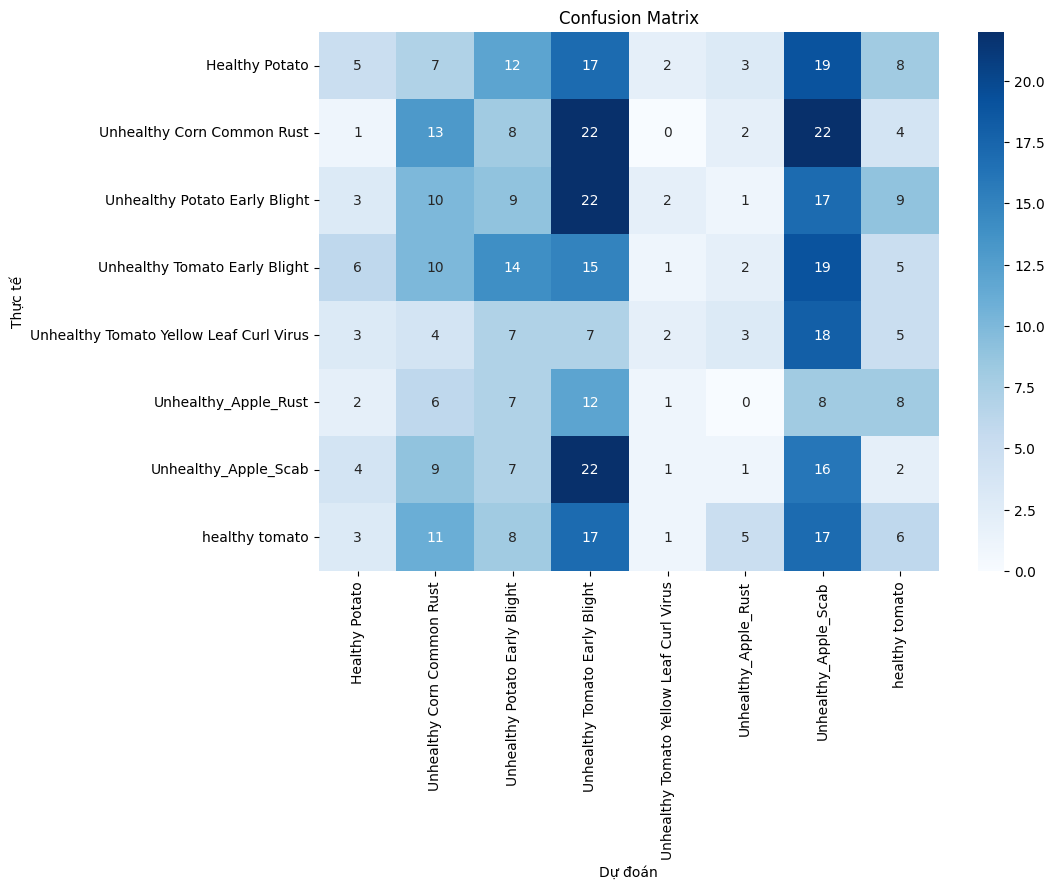

B√°o c√°o ph√¢n lo·∫°i:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.19      0.07      0.10        73
             Unhealthy Corn Common Rust       0.19      0.18      0.18        72
          Unhealthy Potato Early Blight       0.12      0.12      0.12        73
          Unhealthy Tomato Early Blight       0.11      0.21      0.15        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.20      0.04      0.07        49
                   Unhealthy_Apple_Rust       0.00      0.00      0.00        44
                   Unhealthy_Apple_Scab       0.12      0.26      0.16        62
                         healthy tomato       0.13      0.09      0.10        68

                               accuracy                           0.13       513
                              macro avg       0.13      0.12      0.11       513
                           weighted avg       0.14      0.13      0.12       513



In [15]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='ResNet50',finetune=True,regular=True)
trainer.training_testing(epochs=20)

## MobileNet

`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.


B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán MobileNetV2...
Epoch 1/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 74s 220ms/step - accuracy: 0.8823 - loss: 1.0363 - val_accuracy: 0.5928 - val_loss: 6.3004
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49s 185ms/step - accuracy: 0.9632 - loss: 0.3962 - val_accuracy: 0.8219 - val_loss: 2.3508
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 177ms/step - accuracy: 0.9759 - loss: 0.2200 - val_accuracy: 0.8144 - val_loss: 2.4052
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 48s 181ms/step - accuracy: 0.9834 - loss: 0.1241 - val_accuracy: 0.7740 - val_loss: 2.5203
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 177ms/step - accuracy: 0.9788 - loss: 0.1301 - val_accuracy: 0.7515 - val_loss: 2.4689
Epoch 6/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 178ms/step - accur

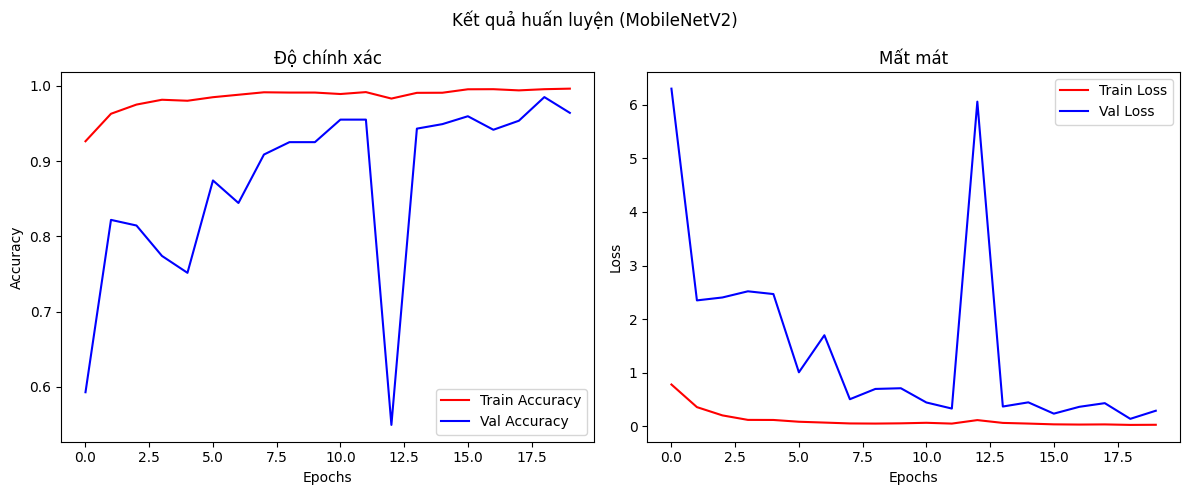

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 230ms/step


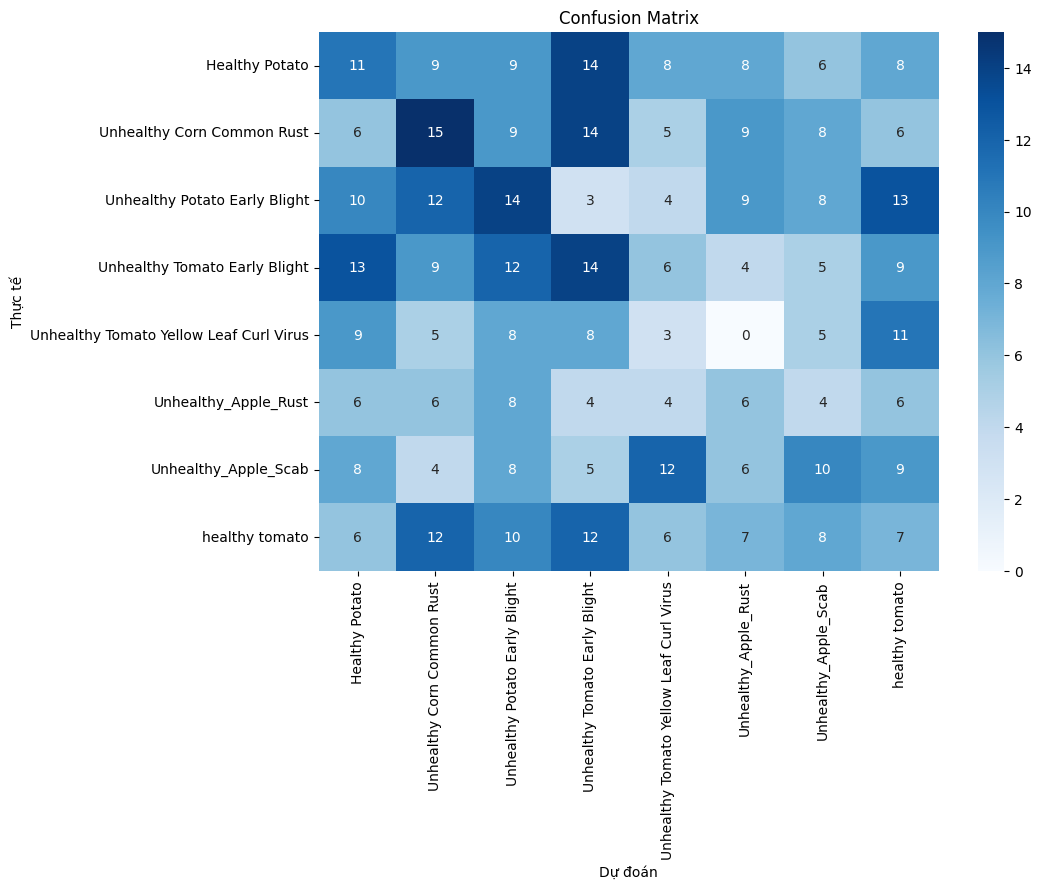

B√°o c√°o ph√¢n lo·∫°i:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.16      0.15      0.15        73
             Unhealthy Corn Common Rust       0.21      0.21      0.21        72
          Unhealthy Potato Early Blight       0.18      0.19      0.19        73
          Unhealthy Tomato Early Blight       0.19      0.19      0.19        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.06      0.06      0.06        49
                   Unhealthy_Apple_Rust       0.12      0.14      0.13        44
                   Unhealthy_Apple_Scab       0.19      0.16      0.17        62
                         healthy tomato       0.10      0.10      0.10        68

                               accuracy                           0.16       513
                              macro avg       0.15      0.15      0.15       513
                           weighted avg       0.16      0.16      0.16       513



In [16]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='MobileNetV2',finetune=True,regular=True)
trainer.training_testing(epochs=20)

In [17]:
train_path = '/kaggle/working/Plant-Disease-Detection-1/train'
val_path = '/kaggle/working/Plant-Disease-Detection-1/valid'
test_path = '/kaggle/working/Plant-Disease-Detection-1/test'

train_gen = DATALOADER(target_size=(299,299),use_augmentation=False).train_gen(train_path)
val_gen = DATALOADER(target_size=(299,299),use_augmentation=False).val_test_gen(val_path)
test_gen = DATALOADER(target_size=(299,299),use_augmentation=False).val_test_gen(test_path)

Found 8268 images belonging to 8 classes.
Found 668 images belonging to 8 classes.
Found 513 images belonging to 8 classes.


B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán InceptionV3...
Epoch 1/20


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 107s 336ms/step - accuracy: 0.8723 - loss: 1.0232 - val_accuracy: 0.9596 - val_loss: 0.4096
Epoch 2/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 72s 269ms/step - accuracy: 0.9810 - loss: 0.2812 - val_accuracy: 0.9671 - val_loss: 0.2261
Epoch 3/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67s 253ms/step - accuracy: 0.9912 - loss: 0.1179 - val_accuracy: 0.9716 - val_loss: 0.1792
Epoch 4/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 69s 258ms/step - accuracy: 0.9875 - loss: 0.0950 - val_accuracy: 0.9805 - val_loss: 0.1334
Epoch 5/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 65s 245ms/step - accuracy: 0.9952 - loss: 0.0463 - val_accuracy: 0.9805 - val_loss: 0.1389
Epoch 6/20
259/259 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 70s 262ms/step - accuracy: 0.9950 - loss: 0.0425 - val_accuracy: 0.9671 - v

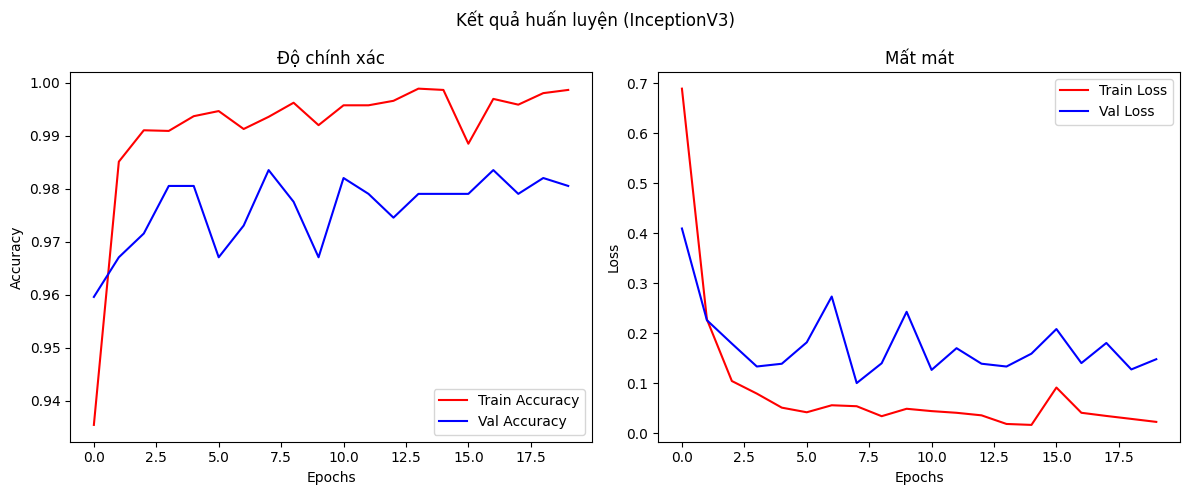

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 546ms/step


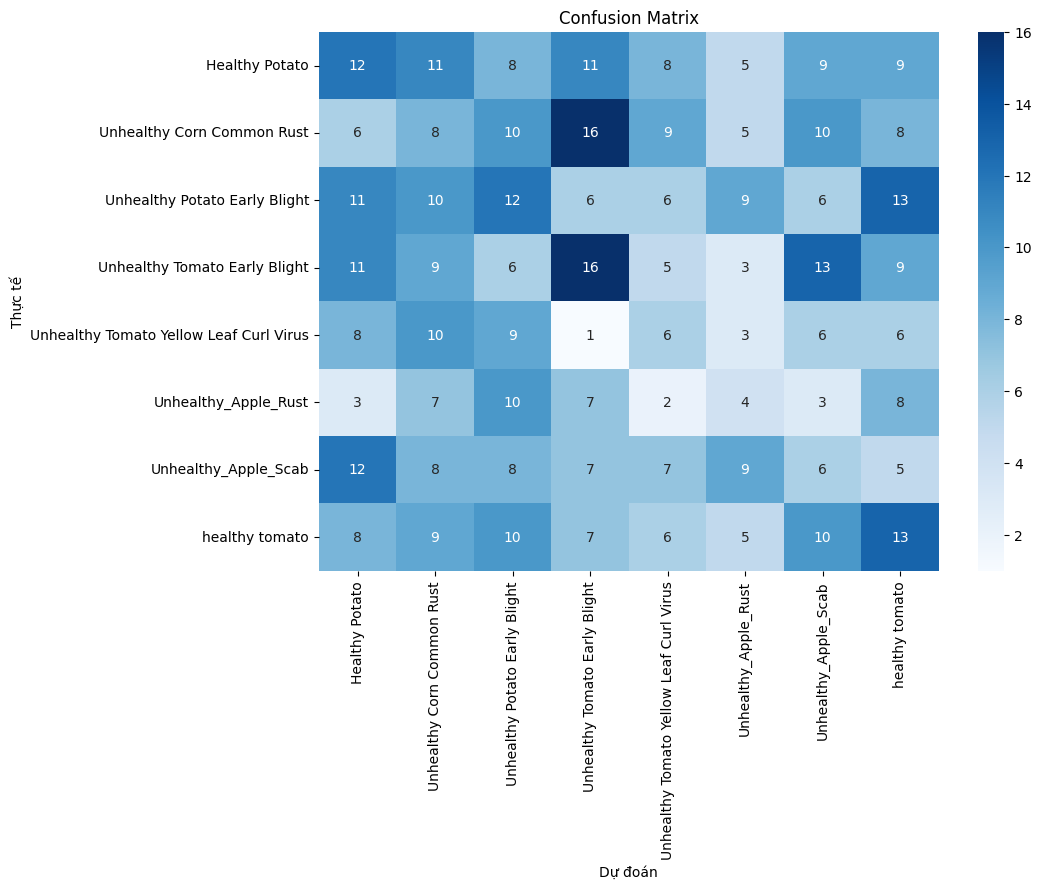

B√°o c√°o ph√¢n lo·∫°i:
                                          precision    recall  f1-score   support

                         Healthy Potato       0.17      0.16      0.17        73
             Unhealthy Corn Common Rust       0.11      0.11      0.11        72
          Unhealthy Potato Early Blight       0.16      0.16      0.16        73
          Unhealthy Tomato Early Blight       0.23      0.22      0.22        72
Unhealthy Tomato Yellow Leaf Curl Virus       0.12      0.12      0.12        49
                   Unhealthy_Apple_Rust       0.09      0.09      0.09        44
                   Unhealthy_Apple_Scab       0.10      0.10      0.10        62
                         healthy tomato       0.18      0.19      0.19        68

                               accuracy                           0.15       513
                              macro avg       0.15      0.15      0.15       513
                           weighted avg       0.15      0.15      0.15       513



In [19]:
trainer = SOTAMODEL(train_gen,val_gen,test_gen, model_name='InceptionV3',finetune=True,regular=True)
trainer.training_testing(epochs=20)